# Cardiovascular Disease


## Problem Statement

## Assumptions

## Research Question

## Methodology

### Importing Libraries

In [2]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Loading The Dataset

In [3]:
df = pd.read_csv("cardio_train.csv", sep = ";")

In [4]:
# This code will help in loading all the records of the dataset when any command will be run to output the dataset
pd.options.display.max_rows = 10000000
pd.options.display.max_columns = 10000000

### Exploratory Data Analysis And Cleaning

In [5]:
df.head(10)  # Provides us the starting 10 rows of the dataset.

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


In [6]:
df.shape  # Provides the total rows and columns

(70000, 13)

In [7]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [9]:
# To find the missing value in the table

df.isnull().sum()
# Results showed that there is no missing values in the columns of the dataset.

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

#### Age

In [10]:
# The age column is in unit of days, instead of years. So, the data of age column will be corrected to years, to better understand the age.
df["age"] = df["age"].apply(lambda x: round(x/365))

In [11]:
df["age"].head(10)

0    50
1    55
2    52
3    48
4    48
5    60
6    61
7    62
8    48
9    54
Name: age, dtype: int64

In [12]:
# describe() is used to view some basic statistical details like percentile, mean, std, etc. of a data frame or a series of numeric values. 
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,53.338686,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,6.765294,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,30.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,65.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


The minimum, maximum and mean age of the age column shows that this dataset consist records of adult patients between the age-group of 30 to 65. 

<Axes: >

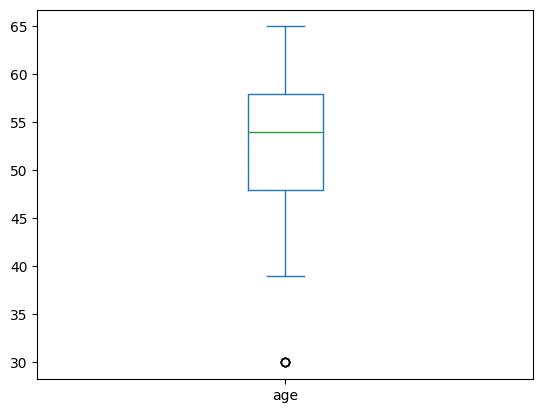

In [13]:
# To check the variance in the values of age by box plot

df['age'].plot(kind = 'box')

In [14]:
# The age value of patients above 35 is very large.
(df["age"] > 35).value_counts()/len(df["age"])*100

age
True     99.994286
False     0.005714
Name: count, dtype: float64

In [15]:
# The age value of patients below 35 is very small.
(df["age"] < 35).value_counts()/len(df["age"])*100

age
False    99.994286
True      0.005714
Name: count, dtype: float64

#### Gender

In [16]:
df["gender"].value_counts()/len(df["gender"])*100

gender
1    65.042857
2    34.957143
Name: count, dtype: float64

In [17]:
# The gender options are mentioned by 1 as women and 2 as men in the dataset. For better computation, we will change this into 0 as women and 1 as men.

df["gender"] = df["gender"].apply(lambda x: x-1)

In [18]:
df["gender"].value_counts()/len(df["gender"])*100

gender
0    65.042857
1    34.957143
Name: count, dtype: float64

In [19]:
df.groupby(by = "gender").mean()

,id,age,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
gender,,,,,,,,,,,,
0,49898.345267,53.452844,161.355612,72.565605,128.139249,94.522776,1.384735,1.235054,0.017856,0.025500,0.802021,0.496727
1,50110.246547,53.126277,169.947895,77.257307,130.078872,100.551982,1.333633,1.210462,0.218880,0.106375,0.806906,0.505231


The above result shows that:
Men are taller than women.
Weight of men is more than women.
Most often the systolic blood pressure is high in men above 120.
Most often the diastolic blood pressure is high in men above 80.

In [21]:
# Changed the column name 'gender' into 'male'.
 
df.rename(columns = {"gender": "male"}, inplace = True)
df.head(10) 

,id,age,male,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,1,168,62.0,110,80,1,1,0,0,1,0
1,1,55,0,156,85.0,140,90,3,1,0,0,1,1
2,2,52,0,165,64.0,130,70,3,1,0,0,0,1
3,3,48,1,169,82.0,150,100,1,1,0,0,1,1
4,4,48,0,156,56.0,100,60,1,1,0,0,0,0
5,8,60,0,151,67.0,120,80,2,2,0,0,0,0
6,9,61,0,157,93.0,130,80,3,1,0,0,1,0
7,12,62,1,178,95.0,130,90,3,3,0,0,1,1
8,13,48,0,158,71.0,110,70,1,1,0,0,1,0
9,14,54,0,164,68.0,110,60,1,1,0,0,0,0


#### Height

<Axes: >

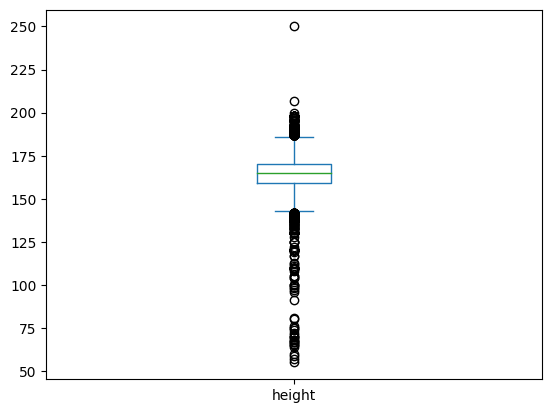

In [23]:
# To check the variance in the values of height by box plot

df['height'].plot(kind = 'box')

In [31]:
# For outliers, the condition Achondroplasia, also known as dwarfism, will be taken as a lower limit.  
# Those with Achondroplasia may have an increased risk of cardiovascular diseases, which would affect the data analysis for the focused parameters.
# Checking the percent of record below the height 147cm.
(df["height"] < 148).value_counts()/len(df)*100

height
False    98.72
True      1.28
Name: count, dtype: float64

In [38]:
# The height of patients below 147cm is removed due to high chances of Anchondroplasia. It is only 1.28 % of the data.
df = df[df["height"] > 147]

In [39]:
# From the box plot of height, it can be observed that there are only 2 data points above 200cm.
# Checking the percent of record above the height 200cm.
(df["height"] > 200).value_counts()/len(df)*100

height
False    99.997093
True      0.002907
Name: count, dtype: float64

In [41]:
# The records of patients having height above 200cm will be removed because tall people mostly have a higher risk of atrial fibrillation and varicose veins related problems.
df = df[df["height"] < 200]